In [2]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Reading the file
skills = pd.read_csv('extracted_skills.csv')

# Removing cols that will not be used
cols_to_preserve = ['programming', 'statistics', 'machine_learning', 'cloud',
                    'big_data', 'relational_db', 'nlp', 'analysis_softwares']
skills = skills[cols_to_preserve]
skills

,programming,statistics,machine_learning,cloud,big_data,relational_db,nlp,analysis_softwares
0,0,1,1,1,0,0,1,0
1,1,1,1,0,1,1,0,0
2,1,1,1,1,0,0,1,1
3,1,1,1,0,0,1,0,1
4,1,1,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...
546,1,1,1,0,1,1,1,0
547,1,1,0,0,0,1,0,1
548,1,1,0,0,0,1,0,0
549,1,1,1,0,1,1,0,1


In [4]:
# Counting required skills
skills.sum(axis=0)

programming           455
statistics            350
machine_learning      340
cloud                 196
big_data              206
relational_db         268
nlp                    79
analysis_softwares    312
dtype: int64

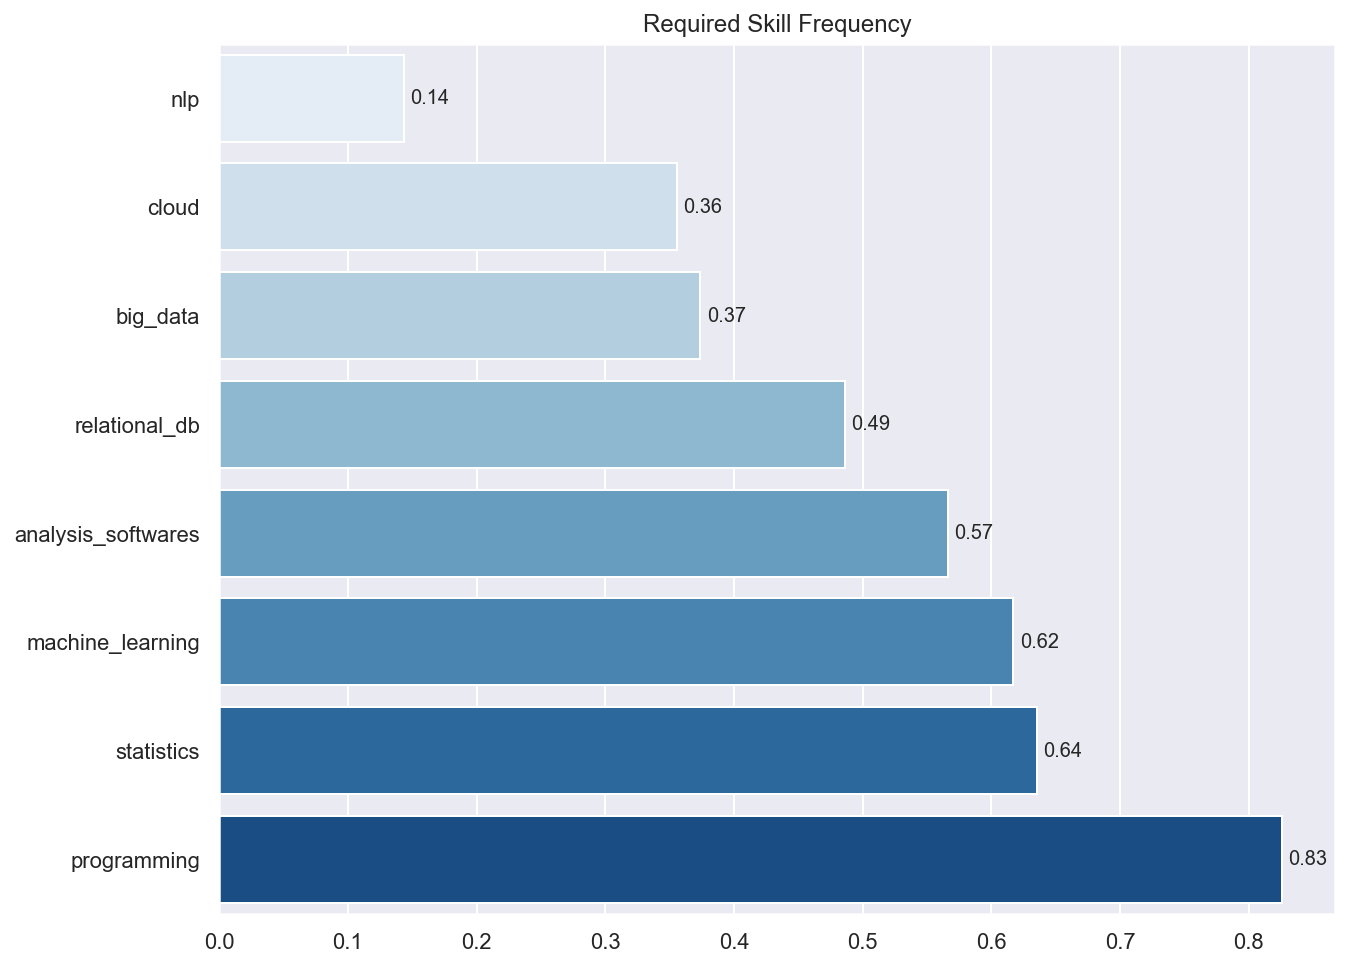

In [14]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sorted_skills = skills.sum(axis=0).sort_values() / 551

sns.set(rc={'figure.figsize':(10, 8)})
skill_plot = sns.barplot(x=sorted_skills.values, y=sorted_skills.index, palette='Blues')
skill_plot.set(title='Required Skill Frequency')

# Adding the count labels
for patch in skill_plot.patches:
    height = patch.get_height() 
    width = patch.get_width() 
    # Adding text to each bar
    skill_plot.text(x = width+0.005, # x-coordinate position of data label
    y=patch.get_y()+(height/2), # # y-coordinate position of data label
    s='{:.2f}'.format(width), 
    va='center',
    size='small') 

In [6]:
# Defining some useful functions

def pair_occurence(count_df):
    # Initializing an empty matrix for pair counting
    pair_matrix = np.zeros((count_df.shape[1], count_df.shape[1]))
    
    # Iterating through all rows and summing the pair counts
    for _, row in count_df.iterrows():
        temp_mat = np.dot(row.values.reshape(-1, 1), row.values.reshape(1, -1))
        pair_matrix = pair_matrix + temp_mat
    
    # Removing redundant values, including the diagonal (diagonal values can be deemd as independent occurence count)
    pair_matrix = np.tril(pair_matrix) / 551
    return pair_matrix

def visualize_matrix(pair_matrix, labels, title='Pair Occurrence'):
    # Drawing the matrix and configuring the axes
    plt.rcParams['figure.figsize'] = (10.0, 10.0)
    plt.figure(dpi=300)
    plt.matshow(pair_matrix, cmap=plt.cm.Blues)
    plt.title(title, fontsize=30, weight='bold')
    plt.colorbar()
    tick_marks = np.arange(pair_matrix.shape[0])
    plt.xticks(tick_marks, labels, fontsize=12, weight='bold', ha='left', rotation=60)
    plt.yticks(tick_marks, labels, fontsize=12, weight='bold')
    
    ax=plt.gca()
    ax.grid(False)

    # Filling in the values in the matrix
    for i, j in itertools.product(range(pair_matrix.shape[0]),
                                  range(pair_matrix.shape[1])):
        if pair_matrix[i, j] != 0:
            num = pair_matrix[i, j]
            plt.text(j, i, '{:.2f}'.format(num), 
                    verticalalignment='center',
                    horizontalalignment='center',
                    color = 'white' if num > np.max(pair_matrix) / 2 else 'black',
                    fontsize='large')
    plt.show()

    

<Figure size 3000x3000 with 0 Axes>

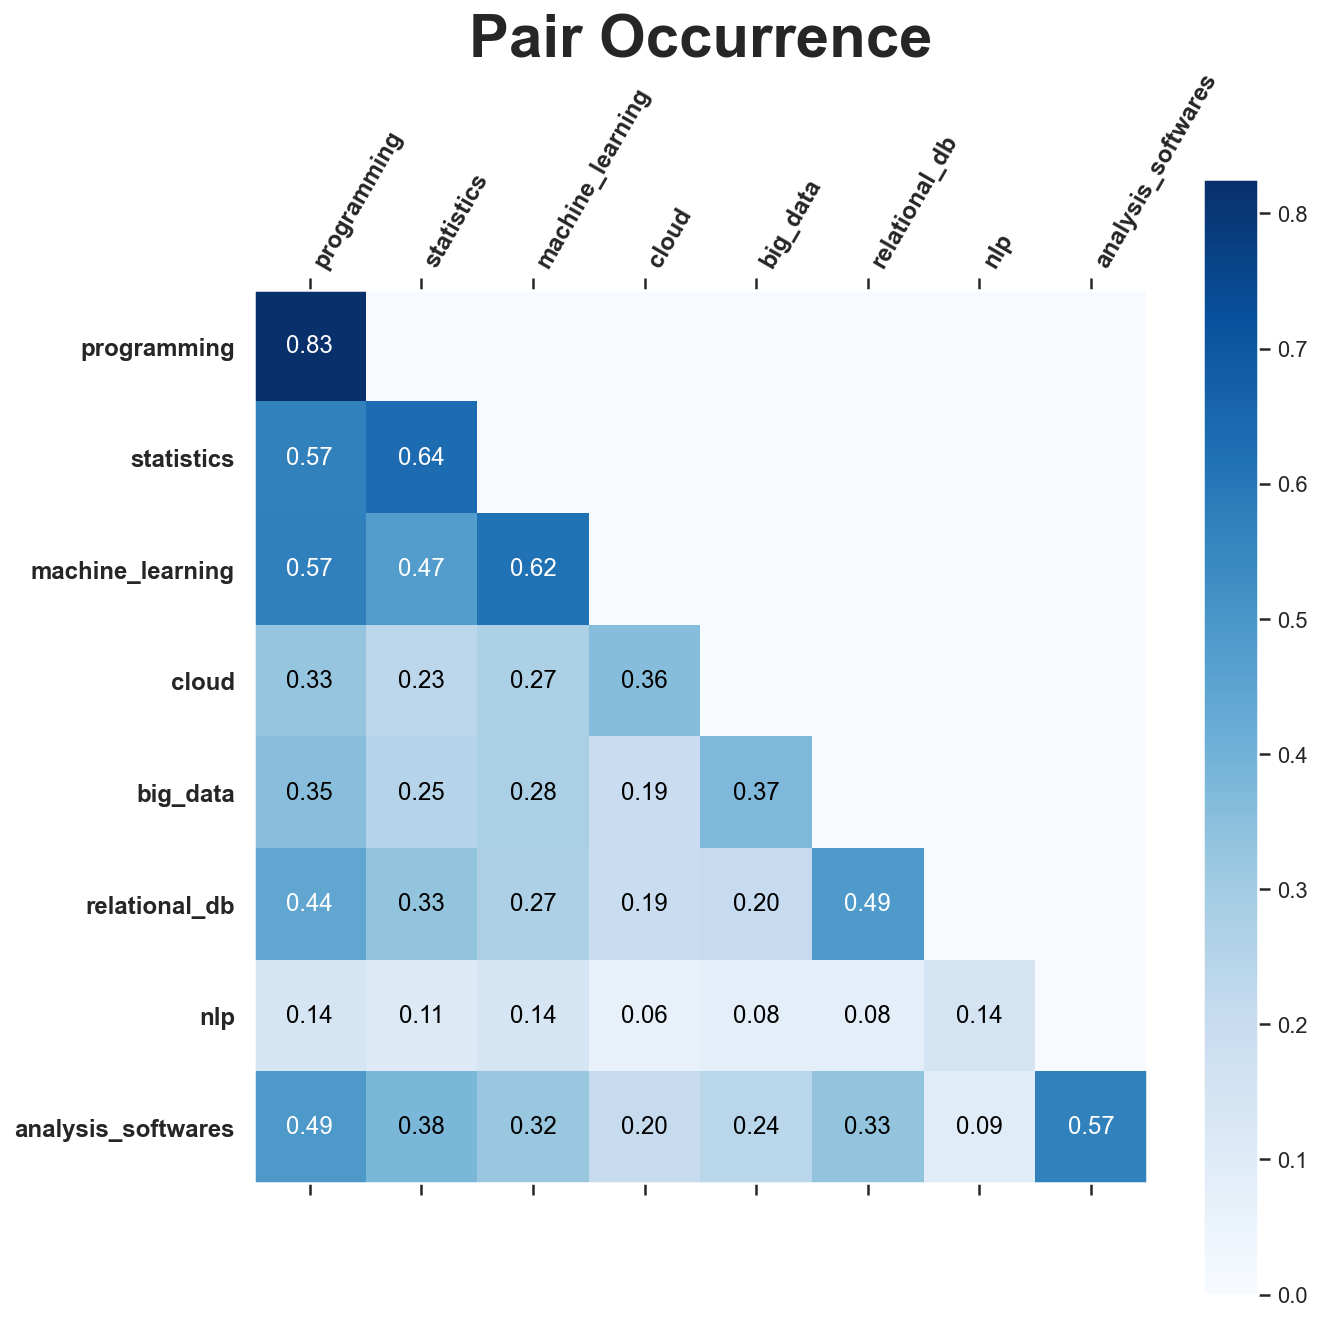

In [7]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
skill_pair_matrix = pair_occurence(skills)
skill_pair_occurrence = visualize_matrix(skill_pair_matrix, skills.columns)